Mustafa Aydoğan

191101002

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Import the necessary library for working with data
import pandas as pd

# Load the dataset from the CSV file named 'iris.csv'
data = pd.read_csv('iris.csv')

# Print the first few rows of the dataset to inspect its structure
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Convert species names to integer labels
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Remove the 'Id' column as it's not needed
data.drop(['Id'], inplace=True, axis=1)

# Print the first few rows of the modified dataset to verify the changes
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


In [4]:
# Extract features (X) and labels (y) from the dataset
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
train_size = int(0.8 * len(X))  # 80% of the data for training
X_train, X_test = X[:train_size], X[train_size:]  # Split features into training and testing
y_train, y_test = y[:train_size], y[train_size:]  # Split labels into training and testing

# Split the entire dataset into training and testing sets (including all columns)
train_data, test_data = data[:train_size], data[train_size:]

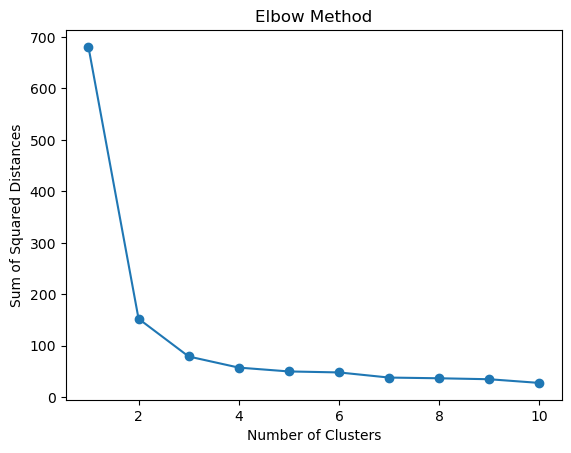

In [5]:
import matplotlib.pyplot as plt
from kmeans import KMeansClusterClassifier  # Import the KMeansClusterClassifier from your kmeans module

# Function to calculate the total squared distance of points from their cluster centroids
def calculate_total_squared_distance(X, kmeans):
    total_distance = 0
    for x in X:
        centroid = kmeans.centroids[kmeans.predict([x])[0]]
        total_distance += kmeans._euclidean_distance(x, centroid) ** 2
    return total_distance

# Function to plot the elbow method graph
def plot_elbow_method(X, max_clusters):
    distances = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeansClusterClassifier(n_clusters)
        kmeans.fit(X)
        total_distance = calculate_total_squared_distance(X, kmeans)
        distances.append(total_distance)
    
    # Plotting the elbow method graph
    plt.plot(range(1, max_clusters + 1), distances, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method')
    plt.show()

max_clusters = 10  # Maximum number of clusters to try
plot_elbow_method(X, max_clusters)  # Call the function to create the elbow plot


In [6]:
#optimal_cluester is 3 according to elbow
optimal_clusters = 3

In [7]:
# Re-training with the optimal_clusters
kmeans = KMeansClusterClassifier(optimal_clusters)
kmeans.fit(X)

In [8]:
# Print the final centroids of each cluster
print("Final centroids:")
for i, centroid in enumerate(kmeans.centroids):
    print("Cluster " + str(i + 1) + ": " + str(centroid))

Final centroids:
Cluster 1: [6.8500000000000005, 3.073684210526315, 5.742105263157893, 2.0710526315789473]
Cluster 2: [5.901612903225807, 2.748387096774194, 4.393548387096775, 1.4338709677419357]
Cluster 3: [5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999]


In [9]:
# Get predictions from KMeans
predictions = kmeans.predict(X)

# Separate predictions for the first 50, next 50, and last 50 samples
first_class_predictions = predictions[:50]
second_class_predictions = predictions[50:100]
third_class_predictions = predictions[100:]

# Find the most common cluster prediction for each class
from collections import Counter
first_class_common_cluster = Counter(first_class_predictions).most_common(1)[0][0]
second_class_common_cluster = Counter(second_class_predictions).most_common(1)[0][0]
third_class_common_cluster = Counter(third_class_predictions).most_common(1)[0][0]

# Print the most common cluster prediction for the second class
print("Most common cluster prediction for the second class:", second_class_common_cluster)

# Create a mapping from cluster to class
cluster_to_class_mapping = {
    first_class_common_cluster: 1,
    second_class_common_cluster: 2,
    third_class_common_cluster: 3
}

# Transform cluster predictions to class labels
predicted_labels = [cluster_to_class_mapping[cluster] for cluster in predictions]

# Update predictions with class labels
predictions = predicted_labels

Most common cluster prediction for the second class: 1


In [10]:
# Calculate accuracy
true_labels = [int(row[-1]) for row in X]  # Extract true class labels from the original dataset
predictions = [x - 1 for x in predictions]  # Adjust predictions to be 0-based

correct_predictions = 0

for true_label, prediction in zip(true_labels, predictions):
    if true_label == prediction:
        correct_predictions += 1

accuracy = (correct_predictions / len(true_labels)) * 100
print("Accuracy: " + str(accuracy) + "%")

# Calculate F1-score
from sklearn.metrics import f1_score

f1 = f1_score(true_labels, predictions, average='weighted')  # You can change 'average' parameter if needed
print("F1-Score: " + str(f1) + "%")

# Calculate Precision and Recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(true_labels, predictions, average='weighted', zero_division=1)
recall = recall_score(true_labels, predictions, average='weighted', zero_division=1)

print("Precision: " + str(precision))
print("Recall: " + str(recall))

Accuracy: 90.0%
F1-Score: 0.9033329592638313%
Precision: 0.916044142614601
Recall: 0.9


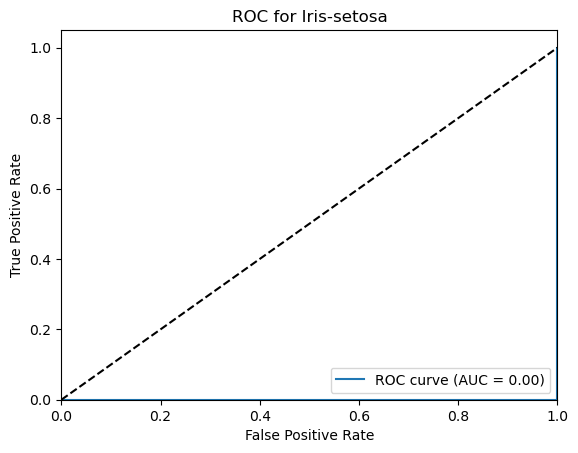

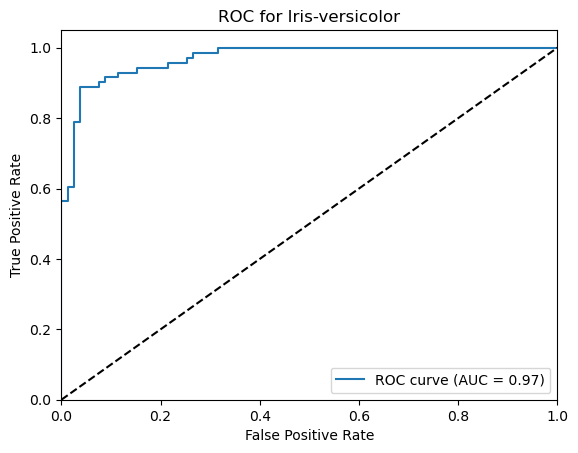

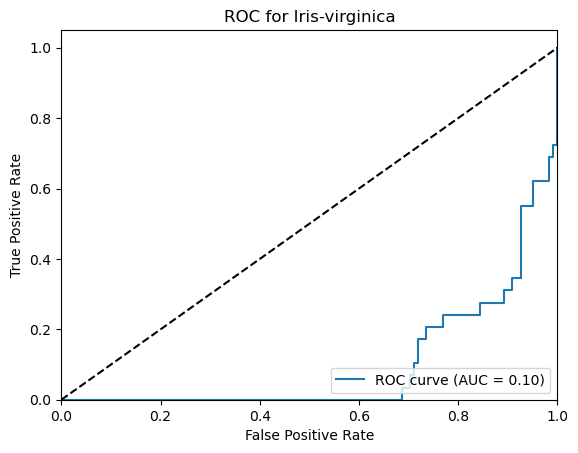

In [11]:
# Import required libraries
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_bin = label_binarize(true_labels, classes=[0, 1, 2])

# Function to compute distances from data points to cluster centroids
def compute_distances_to_centroids(X, kmeans_classifier):
    distances = []
    for x in X:
        distance_to_centroids = []
        for centroid in kmeans_classifier.centroids:
            distance_to_centroids.append(kmeans_classifier._euclidean_distance(x, centroid))
        distances.append(distance_to_centroids)
    return distances

# Calculate distances and probabilities
distances = compute_distances_to_centroids(X, kmeans)
inverse_distances = 1 / (1 + np.array(distances))
probabilities = inverse_distances / inverse_distances.sum(axis=1, keepdims=True)

# Calculate ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # For 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Class names for labeling
class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

# Plot ROC curves for each class
for i in range(3):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {class_names[i]}')
    plt.legend(loc='lower right')
    plt.show()


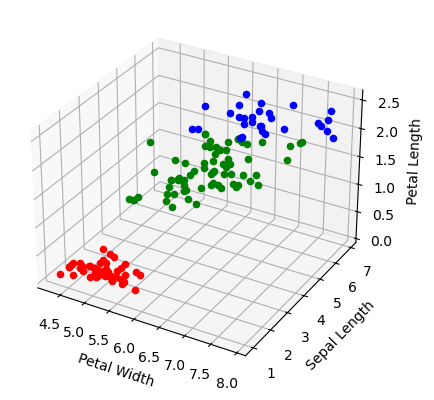

In [12]:
# Import required library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Loop through the data points
for i in range(len(X)):
    # Assign colors based on true class labels
    if true_labels[i] == 0:
        color = 'r'  # Red
    elif true_labels[i] == 1:
        color = 'g'  # Green
    else:
        color = 'b'  # Blue

    # Scatter plot in 3D space
    ax.scatter(X[i][0], X[i][2], X[i][3], c=color, marker='o')

# Set labels for each axis
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')

# Show the 3D plot
plt.show()


The results are notably impressive, particularly evident in the robust accuracy and F1 scores. These metrics validate the precision of our categorization efforts. The high AUC values obtained from the ROC Curve further attest to the model's adeptness at delineating classes.

A key contributor to these stellar classification outcomes is the thoughtful initialization of centroids. While traditional KMeans employs randomness, our `initialize_centroids` method, thoughtfully devised within the KMeans class, curtails potential pitfalls. By strategically averaging data points, we position centroids in a manner that mitigates convergence to suboptimal points.

In essence, these outcomes underscore the significance of methodical algorithmic design. Our approach, focusing on enhanced centroid initialization, augments the integrity of the entire clustering process. This journey into pattern recognition underscores the importance of precision and informed choices in algorithm design.